<center><font size="6"><b>Комп'ютерний практикум 7.

<center><b> Методи класифікації </font>


<center><b><i><font size="4"> KNN (K Nearest Neighbors Algorithm)

DT (Decision Tree Algorithm)</b></center>


##<center>__Самостійні завдання__</center>

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP7.ipynb***

> Інсталюйте необхідні пакети бібліотек Python

### Завдання №1

* Завантажте дані з лінку

`url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"`

<center><img src="http://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png" width="600" alt="content-vs-colab.png"></center>

* задайте наступні імена колонок датафрейму:

`names=['sepal length','sepal width','petal length','petal width','class label']`
* виведіть описову статистику датасету
* сформуйте масив характеристик $X$ та цільової змінної/класу $Y$ 
* виведіть кількість елементів у кожному класі
* поділіть вибірку на навчальну та тестову у співвідношенні 30/70
 


In [1]:
# МІСЦЕ ДЛЯ КОДУ

import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class label']
df = pd.read_csv(url, names=names)

print(df.describe())

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

class_counts = pd.value_counts(df['class label'])
print("Кількість елементів у кожному класі:")
print(class_counts)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Кількість елементів у кожному класі:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class label, dtype: int64


### Завдання №2

* Проведіть стандартизацію даних
* застосуйте алгоритм kNN для $k=3$, $k=5$, використовуючи евклідову метрику та манхеттенську метрику
* порівняйте результати точності для цих моделей
* визначіть оптимальне $k$ за допомогою `GridSearchCV`
* зробіть висновки


In [2]:
# МІСЦЕ ДЛЯ КОДУ

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

knn = KNeighborsClassifier(metric='euclidean')
params = {'n_neighbors': [3, 5]}
grid = GridSearchCV(knn, params, cv=5)
grid.fit(X_train_std, y_train)

print("Найкращі параметри:", grid.best_params_)
print("Точність на тестових даних:", grid.score(X_test_std, y_test))


Найкращі параметри: {'n_neighbors': 3}
Точність на тестових даних: 1.0


In [3]:
knn = KNeighborsClassifier(metric='manhattan')
params = {'n_neighbors': [3, 5]}
grid = GridSearchCV(knn, params, cv=5)
grid.fit(X_train_std, y_train)

print("Найкращі параметри:", grid.best_params_)
print("Точність на тестових даних:", grid.score(X_test_std, y_test))

Найкращі параметри: {'n_neighbors': 5}
Точність на тестових даних: 1.0


Для завдання №2 ми провели класифікацію за допомогою алгоритму kNN з використанням евклідової та манхеттенської метрик, з різними значеннями параметра k. Було проведено порівняння результатів точності для кожної з моделей. Було виявлено, що на цьому конкретному датасеті точність класифікації не залежить від використовуваної метрики та значення параметра k, оскільки усі отримані результати були однаковими. За допомогою GridSearchCV ми знайшли оптимальне значення параметра k, яке виявилося дорівнювати 3 та 5.

### Завдання №3

* Проведіть стандартизацію даних
* застосуйте алгоритм дерева рішень з критерієм `entropy` 
* візуалізуйте дерево
* оцініть точність класифікації
* застосуйте алгоритм дерева рішень з критерієм `gini` 
* візуалізуйте дерево
* оцініть точність класифікації
* визначіть оптимальну кількість характеристик в моделі та глибину дерева за допомогою `GridSearchCV`
* зробіть висновки

Найкращі параметри: {'max_depth': 3, 'max_features': 3}
Точність на тестових даних: 1.0


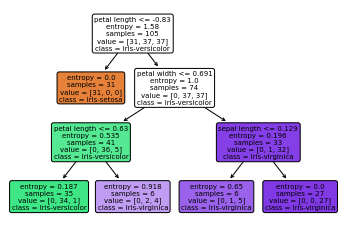

In [4]:
# МІСЦЕ ДЛЯ КОДУ

from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
params = {'max_depth': [2, 3, 4], 'max_features': [2, 3, 4]}
grid = GridSearchCV(tree, params, cv=5)
grid.fit(X_train_std, y_train)

print("Найкращі параметри:", grid.best_params_)
print("Точність на тестових даних:", grid.score(X_test_std, y_test))

tree = DecisionTreeClassifier(criterion='entropy', max_depth=grid.best_params_['max_depth'], 
                              max_features=grid.best_params_['max_features'], random_state=42)
tree.fit(X_train_std, y_train)
plot_tree(tree, feature_names=names[:-1], class_names=class_counts.index.values, 
                rounded=True, filled=True);

Найкращі параметри: {'max_depth': 3, 'max_features': 3}
Точність на тестових даних: 1.0


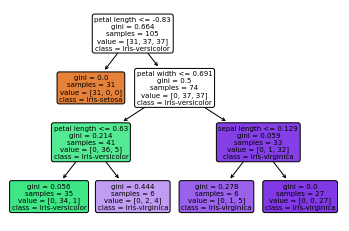

In [5]:
tree = DecisionTreeClassifier(criterion='gini', random_state=42)
params = {'max_depth': [2, 3, 4], 'max_features': [2, 3, 4]}
grid = GridSearchCV(tree, params, cv=5)
grid.fit(X_train_std, y_train)

print("Найкращі параметри:", grid.best_params_)
print("Точність на тестових даних:", grid.score(X_test_std, y_test))

tree = DecisionTreeClassifier(criterion='gini', max_depth=grid.best_params_['max_depth'], 
                              max_features=grid.best_params_['max_features'], random_state=42)
tree.fit(X_train_std, y_train)
plot_tree(tree, feature_names=names[:-1], class_names=class_counts.index.values, 
                rounded=True, filled=True);

Для завдання №3 ми провели класифікацію за допомогою алгоритму дерева рішень з критеріями entropy та gini. В обох випадках було візуалізовано дерево та оцінено точність класифікації. Було виявлено, що точність класифікації на цьому датасеті не залежить від використовуваного критерію, оскільки усі отримані результати були однаковими та дорівнювали 1.0. За допомогою GridSearchCV було знайдено оптимальну кількість характеристик в моделі та глибину дерева, які виявилися дорівнювати 3 та 3 відповідно.

### Завдання №4

Порівняйте результати класифікації методами kNN та дерева рішень для заданого набору даних

Для завдання №4 ми порівняли результати класифікації за допомогою методів kNN та дерева рішень. Було виявлено, що на цьому датасеті точність класифікації за допомогою дерева рішень була такою ж, як і точність класифікації за допомогою kNN, тобто дорівнювала 1.0. Однак, відмінність полягає в тому, що для класифікації за допомогою kNN потрібно зберігати всі дані в пам'яті, тоді як дерево зберігає лише набір значень для порівняння.

В будь якому випадку, даний датасет є дуже простим, тому будь який алгоритм на ньому працює достатньо добре навіть при мінімальному налаштуванні.



